<a href="https://colab.research.google.com/github/MariuszGrecki/Machine_learning_muller_guido/blob/main/Naiwne_klasyfikatory_bayesa%2BDrzewa_decyzyjne%2Blasy_losowe%2Bdrzewa_regresji%2Bwektory_nosne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt

X= np.array(
    [
        [0, 1, 0, 1],
        [1, 0, 1, 1],
        [0, 0, 0, 1],
        [1, 0, 1, 0]
    ]
)
y = np.array(
    [0, 1, 0, 1]
)

counts = {}
for label in np.unique(y):
  counts[label] = X[y == label].sum(axis=0)
print("Sumy cech:\n{}".format(counts))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.9 MB/s eta 0:00:00
Sumy cech:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# Drzewa decyzyjne

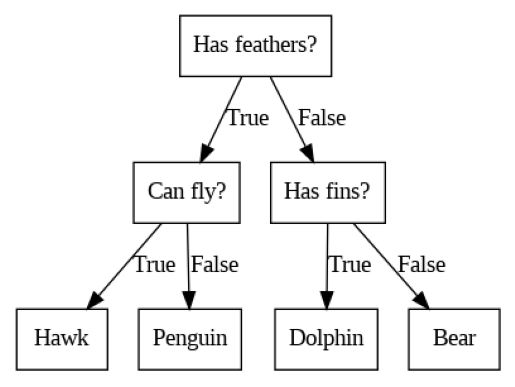

In [3]:

mglearn.plots.plot_animal_tree()

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Dokładność w zestawie uczącym ", tree.score(X_train, y_train))
print("Dokładność w zestawie testowym ", tree.score(X_test, y_test))

Dokładność w zestawie uczącym  1.0
Dokładność w zestawie testowym  0.9370629370629371


In [5]:
#ograniczenie nadmiernemo rozrostowi
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Dokładność w zestawie uczącym ", tree.score(X_train, y_train))
print("Dokładność w zestawie testowym ", tree.score(X_test, y_test))

Dokładność w zestawie uczącym  0.9882629107981221
Dokładność w zestawie testowym  0.951048951048951


In [6]:
#waznośc cech w drzewach
print("ważność cech w drzewach", tree.feature_importances_)

ważność cech w drzewach [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


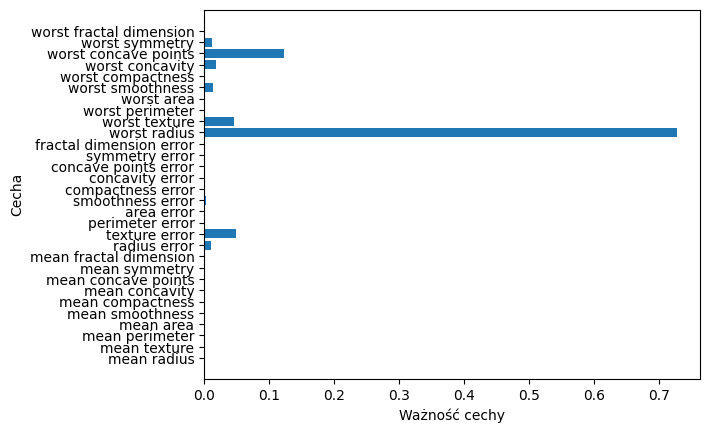

In [7]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Ważność cechy")
  plt.ylabel("Cecha")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


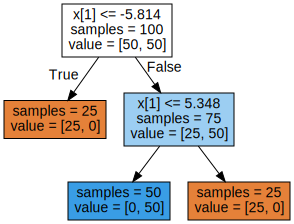

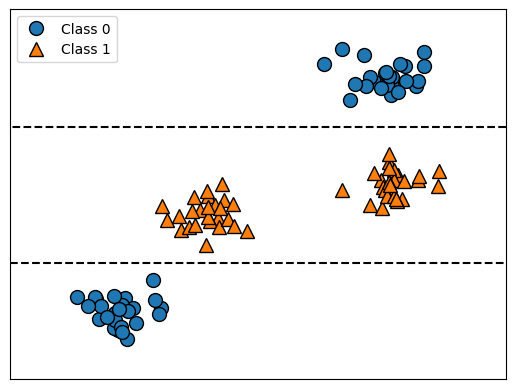

In [8]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# Lasy losowe

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_tes, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

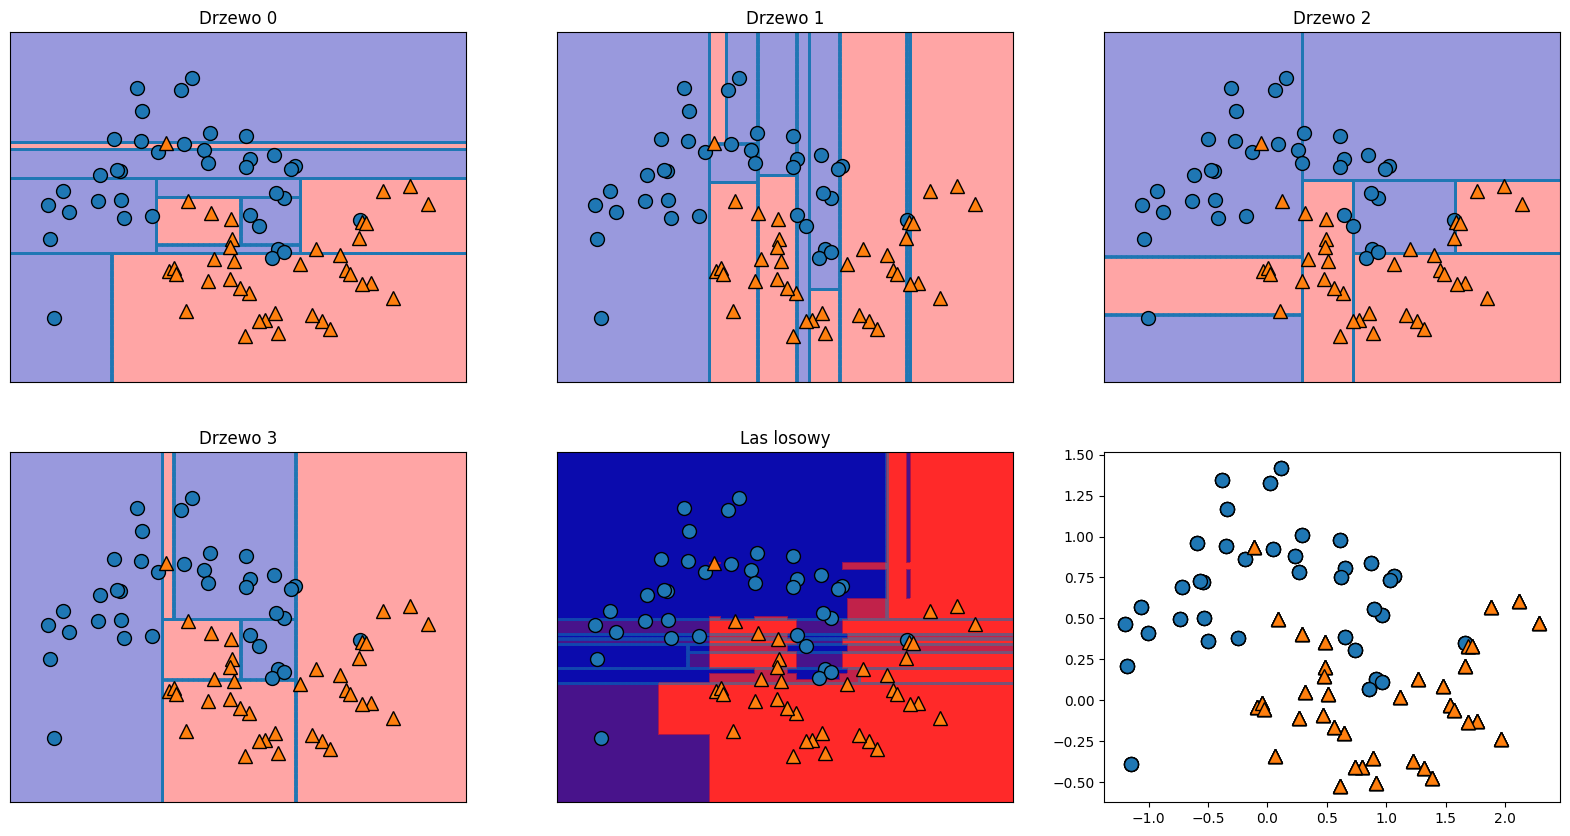

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Drzewo {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
  mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,1], alpha=.4)
  axes[-1,1].set_title("Las losowy")
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

1.0
0.965034965034965


In [12]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.9906103286384976
0.972027972027972


In [13]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.9882629107981221
0.965034965034965


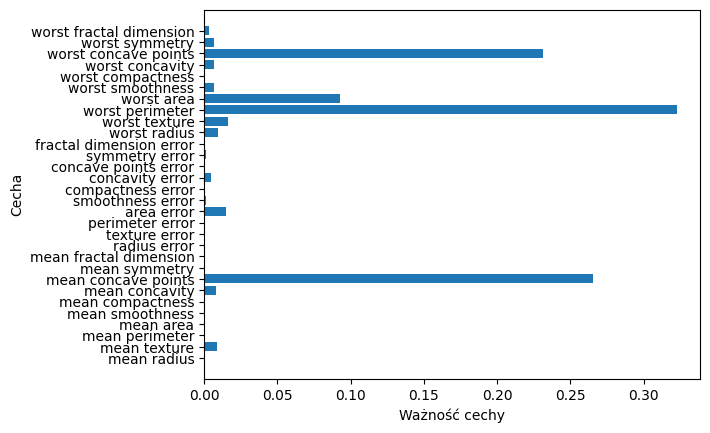

In [14]:
#waznosc cech
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

# Wektory nosne

Text(0, 0.5, 'cecha 1')

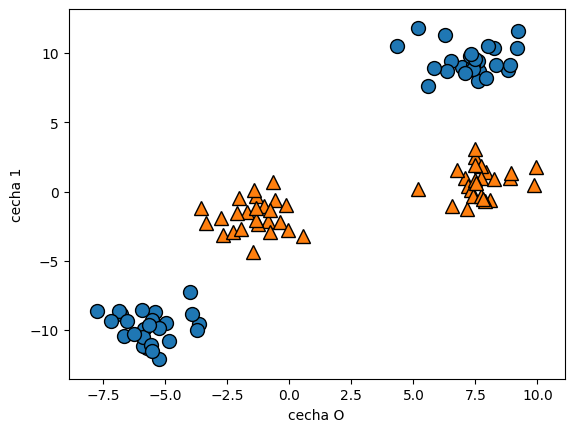

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y=y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("cecha O")
plt.ylabel("cecha 1")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Cecha 1')

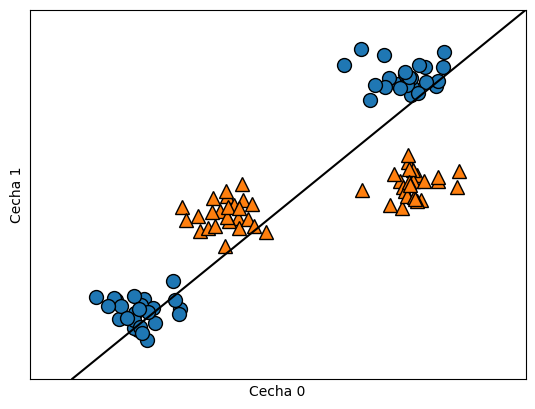

In [18]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

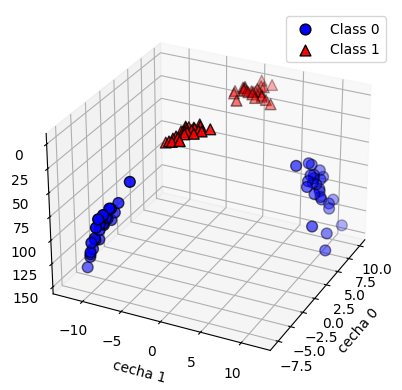

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Dodaj pierwszą cechę podniesioną do kwadratu
X_new = np.hstack([X, X[:, 1:] ** 2])

# Tworzenie figury 3D
figure = plt.figure()

# Wizualizacja 3D
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)

# Umieść na wykresie wszystkie punkty z y = 0, a następnie z y = 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k', label='Class 0')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k', label='Class 1')

# Ustawienie etykiet osi
ax.set_xlabel("cecha 0")
ax.set_ylabel("cecha 1")
ax.set_zlabel("cecha 1 ** 2")

# Dodanie legendy
ax.legend()

# Pokaż wykres
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


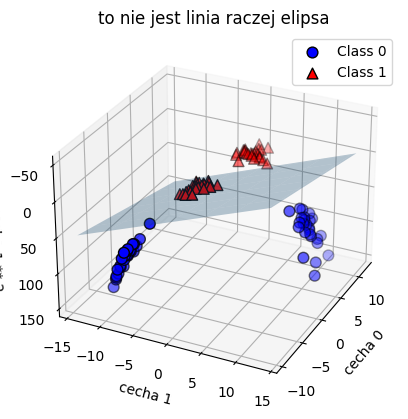

In [28]:
# Trenowanie modelu LinearSVC
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Tworzenie figury 3D
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)

# Zakres wartości dla siatki
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)

# Obliczanie powierzchni decyzyjnej
ZZ = (-coef[0] * XX - coef[1] * YY - intercept) / coef[2]

# Rysowanie powierzchni decyzyjnej
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# Maski dla różnych klas
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k', label='Class 0')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k', label='Class 1')

# Ustawienie etykiet osi
ax.set_xlabel("cecha 0")
ax.set_ylabel("cecha 1")
ax.set_zlabel("cecha 1 ** 2")

# Dodanie legendy
ax.legend()

ax.set_title('to nie jest linia raczej elipsa')

# Pokaż wykres
plt.show()

# Kernel trick SVM

Text(0, 0.5, 'Cecha 1')

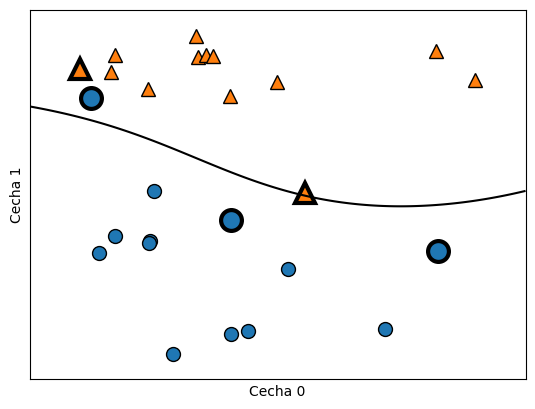

In [31]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Cecha 0")
plt.ylabel("Cecha 1")

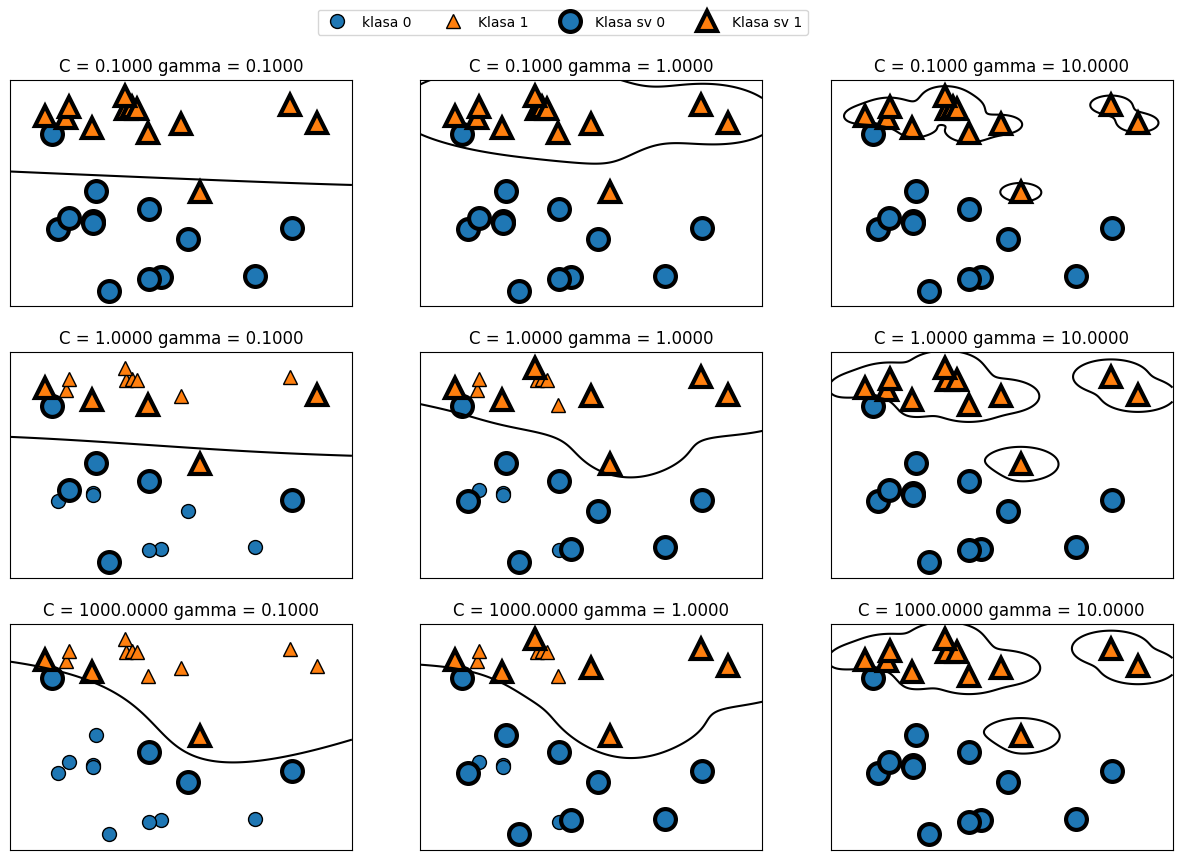

In [32]:
#granice decyzyjne i wkeotry pomocnicze dla róznych ustawień parametrów C i gamma
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip(ax, range(-1,2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["klasa 0", "Klasa 1", "Klasa sv 0", "Klasa sv 1"], ncol=4, loc=(.9, 1.2))

In [ ]:
#